In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In [3]:
df = pd.read_csv('C:/ClassesMSC/DataSets/layoffs_data.csv')
df.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Zoomo,Sydney,Transportation,27.0,0.08,02-05-2023,https://www.businessnewsaustralia.com/articles...,105.0,Series B,02-05-2023 16.26,Australia,Unknown
1,Lev,New York City,Real Estate,34.0,NaN,01-05-2023,https://therealdeal.com/new-york/2023/05/01/cr...,114.0,Series B,01-05-2023 23.51,United States,Unknown
2,PharmEasy,Mumbai,Healthcare,NaN,NaN,01-05-2023,https://www.dealstreetasia.com/stories/pharmea...,1600.0,Unknown,02-05-2023 16.23,India,Unknown
3,Cogito,New Delhi,Data,177.0,NaN,29-04-2023,https://inc42.com/buzz/protests-erupt-data-sta...,NaN,Unknown,01-05-2023 14.36,India,Unknown
4,Cue Health,San Diego,Healthcare,326.0,0.30,28-04-2023,https://www.sec.gov/Archives/edgar/data/162894...,899.0,Post-IPO,01-05-2023 23.57,United States,https://docs.google.com/spreadsheets/d/1P5d2Cr...


In [4]:
df.shape

(2553, 12)

In [5]:
df.columns

Index(['Company', 'Location', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'List_of_Employees_Laid_Off'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2553 non-null   object 
 1   Location                    2553 non-null   object 
 2   Industry                    2553 non-null   object 
 3   Laid_Off_Count              1752 non-null   float64
 4   Percentage                  1699 non-null   float64
 5   Date                        2551 non-null   object 
 6   Source                      2553 non-null   object 
 7   Funds_Raised                2302 non-null   float64
 8   Stage                       2553 non-null   object 
 9   Date_Added                  2553 non-null   object 
 10  Country                     2553 non-null   object 
 11  List_of_Employees_Laid_Off  2552 non-null   object 
dtypes: float64(3), object(9)
memory usage: 239.5+ KB


In [7]:
df.dtypes

Company                        object
Location                       object
Industry                       object
Laid_Off_Count                float64
Percentage                    float64
Date                           object
Source                         object
Funds_Raised                  float64
Stage                          object
Date_Added                     object
Country                        object
List_of_Employees_Laid_Off     object
dtype: object

In [8]:
df.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,1752.000000,1699.000000,2302.000000
mean,255.687215,0.261199,813.626975
std,840.166366,0.259197,5442.263467
min,3.000000,0.000000,0.000000
25%,38.000000,0.100000,50.000000
50%,80.000000,0.170000,156.000000
75%,180.000000,0.300000,442.000000
max,12000.000000,1.000000,121900.000000


In [9]:
df.isnull().sum()

Company                         0
Location                        0
Industry                        0
Laid_Off_Count                801
Percentage                    854
Date                            2
Source                          0
Funds_Raised                  251
Stage                           0
Date_Added                      0
Country                         0
List_of_Employees_Laid_Off      1
dtype: int64

In [10]:
df.Industry.unique()

array(['Transportation', 'Real Estate', 'Healthcare', 'Data', 'Finance',
       'Food', 'Other', 'Recruiting', 'HR', 'Infrastructure', 'Retail',
       'Consumer', 'Education', 'Construction', 'Media', 'Hardware',
       'Security', 'Crypto', 'Travel', 'Sales', 'Marketing',
       'Manufacturing', 'Fitness', 'Support', 'Unknown', 'Logistics',
       'Product', 'Legal', 'Energy', 'Aerospace'], dtype=object)

In [11]:
df.Company.nunique()

2024

In [12]:
df.Stage.unique()

array(['Series B', 'Unknown', 'Post-IPO', 'Series E', 'Private Equity',
       'Acquired', 'Series C', 'Seed', 'Series A', 'Series D', 'Series F',
       'Series H', 'Subsidiary', 'Series G', 'Series J', 'Series I'],
      dtype=object)

In [13]:
df.Country.unique()

array(['Australia', 'United States', 'India', 'Singapore', 'Canada',
       'Germany', 'Saudi Arabia', 'Poland', 'France', 'Philippines',
       'Israel', 'United Kingdom', 'Nigeria', 'Chile', 'New Zealand',
       'Spain', 'China', 'Sweden', 'Austria', 'Ukraine', 'Switzerland',
       'Ireland', 'Indonesia', 'Japan', 'Brazil', 'South Korea', 'Italy',
       'Estonia', 'Finland', 'Netherlands', 'Portugal', 'Colombia',
       'Argentina', 'Seychelles', 'Mexico', 'Egypt', 'Kenya',
       'Luxembourg', 'Greece', 'Norway', 'Belgium', 'Denmark',
       'Hong Kong', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand',
       'Lithuania', 'Ghana', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Romania', 'Turkey',
       'Russia', 'Uruguay', 'Bulgaria', 'South Africa', 'Czech Republic',
       'Myanmar'], dtype=object)

In [14]:
df.duplicated().sum()

0

In [15]:
df.query('Percentage == 1.00')

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
6,Providoor,Melbourne,Food,NaN,1.0,28-04-2023,https://www.afr.com/technology/celebrity-chef-...,NaN,Unknown,29-04-2023 3.11,Australia,Unknown
21,RenoRun,Montreal,Construction,NaN,1.0,26-04-2023,https://betakit.com/renorun-shuts-down-operati...,163.0,Series B,02-05-2023 18.08,Canada,Unknown
40,CoLab,Sydney,Food,NaN,1.0,18-04-2023,https://7news.com.au/lifestyle/food/australian...,3.0,Seed,20-04-2023 15.57,Australia,Unknown
46,Quadream,Tel Aviv,Security,NaN,1.0,16-04-2023,https://www.calcalistech.com/ctechnews/article...,NaN,Unknown,17-04-2023 0.59,Israel,Unknown
52,Bluepad,Bengaluru,Media,NaN,1.0,13-04-2023,https://inc42.com/buzz/vernacular-content-plat...,NaN,Seed,14-04-2023 3.07,India,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2534,Service,Los Angeles,Travel,NaN,1.0,20-03-2020,https://techcrunch.com/2020/03/16/travel-savin...,5.0,Seed,01-04-2020 21.17,United States,Unknown
2537,Ejento,SF Bay Area,Recruiting,84.0,1.0,19-03-2020,https://layoffs.fyi/list/ejento/,NaN,Unknown,28-03-2020 20.52,United States,Unknown
2541,Popin,New York City,Fitness,NaN,1.0,19-03-2020,https://www.businessinsider.com/fitness-app-po...,13.0,Unknown,06-04-2020 23.47,United States,Unknown
2545,Help.com,Austin,Support,16.0,1.0,16-03-2020,LinkedIn,6.0,Seed,16-04-2020 6.36,United States,Unknown


### Issues
1. Drop Unwanted Columns
2. Change Columns Names to Small Letters
3. Change Date column data type to datetime
4. Extract (year-month-day) From Date Column to Create New Columns
5. Filling Missing values with zeros
6. Change Laid_Off_Count column data type to integer

****

## Cleaning Data

In [16]:
#i used function to first drop unwanted columns
#second to make columns labels lower case 

def new_columns():
    df.drop(['List_of_Employees_Laid_Off','Source','Date_Added'], axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower(),inplace=True)
    return new_columns
new_columns()
df.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country
0,Zoomo,Sydney,Transportation,27.0,0.08,02-05-2023,105.0,Series B,Australia
1,Lev,New York City,Real Estate,34.0,NaN,01-05-2023,114.0,Series B,United States
2,PharmEasy,Mumbai,Healthcare,NaN,NaN,01-05-2023,1600.0,Unknown,India
3,Cogito,New Delhi,Data,177.0,NaN,29-04-2023,NaN,Unknown,India
4,Cue Health,San Diego,Healthcare,326.0,0.30,28-04-2023,899.0,Post-IPO,United States


In [17]:
#function for first change date colum data type to datetime
#then extract year, month, day to create new columns
def created_columns():
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day_name()
    df['year'] = df['date'].dt.year
    return created_columns
created_columns()
df.dtypes

C:\Users\JERIN\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-04-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\JERIN\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-04-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\JERIN\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-04-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\JERIN\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-04-2023' in DD/MM/YYYY format. Provide format or specif

company                   object
location                  object
industry                  object
laid_off_count           float64
percentage               float64
date              datetime64[ns]
funds_raised             float64
stage                     object
country                   object
month                    float64
day                       object
year                     float64
dtype: object

In [18]:
df.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
0,Zoomo,Sydney,Transportation,27.0,0.08,2023-02-05,105.0,Series B,Australia,2.0,Sunday,2023.0
1,Lev,New York City,Real Estate,34.0,NaN,2023-01-05,114.0,Series B,United States,1.0,Thursday,2023.0
2,PharmEasy,Mumbai,Healthcare,NaN,NaN,2023-01-05,1600.0,Unknown,India,1.0,Thursday,2023.0
3,Cogito,New Delhi,Data,177.0,NaN,2023-04-29,NaN,Unknown,India,4.0,Saturday,2023.0
4,Cue Health,San Diego,Healthcare,326.0,0.30,2023-04-28,899.0,Post-IPO,United States,4.0,Friday,2023.0


In [19]:
df.fillna(0, inplace=True)
df.isnull().any()

company           False
location          False
industry          False
laid_off_count    False
percentage        False
date              False
funds_raised      False
stage             False
country           False
month             False
day               False
year              False
dtype: bool

In [20]:
#create function to change data types of laid_off_count, year, month columns to integer
def new_datatypes():
    columns = ['laid_off_count', 'year', 'month']
    for c in columns:
        df[c] = df[c].astype(int)
    return new_datatypes
new_datatypes()
df.dtypes

company            object
location           object
industry           object
laid_off_count      int32
percentage        float64
date               object
funds_raised      float64
stage              object
country            object
month               int32
day                object
year                int32
dtype: object

****

## Exploratory Data Analysis

In [21]:
df.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
0,Zoomo,Sydney,Transportation,27,0.08,2023-02-05 00:00:00,105.0,Series B,Australia,2,Sunday,2023
1,Lev,New York City,Real Estate,34,0.00,2023-01-05 00:00:00,114.0,Series B,United States,1,Thursday,2023
2,PharmEasy,Mumbai,Healthcare,0,0.00,2023-01-05 00:00:00,1600.0,Unknown,India,1,Thursday,2023
3,Cogito,New Delhi,Data,177,0.00,2023-04-29 00:00:00,0.0,Unknown,India,4,Saturday,2023
4,Cue Health,San Diego,Healthcare,326,0.30,2023-04-28 00:00:00,899.0,Post-IPO,United States,4,Friday,2023


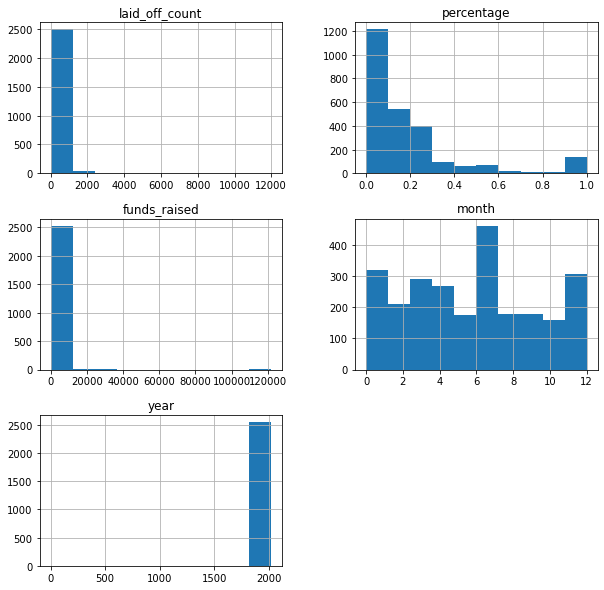

In [22]:
df.hist(figsize=(10,10));

In [23]:
#find layoffs for each year
df.groupby('year')['laid_off_count'].sum()

year
0          547
2020     80998
2021     15823
2022    164576
2023    186020
Name: laid_off_count, dtype: int32

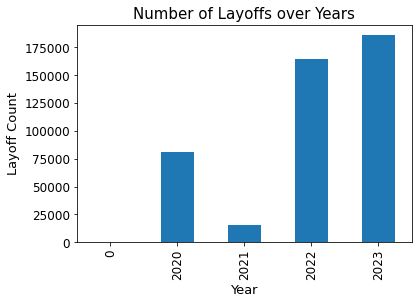

In [24]:
#plotting it with bar chart
df.groupby('year')['laid_off_count'].sum().plot(kind='bar',fontsize=12)
plt.title('Number of Layoffs over Years',size=15)
plt.xlabel('Year',size=13)
plt.ylabel('Layoff Count',size=13);

> **In 2020, almost 81k employees were laid off. In 2021, the situation has become better with 15k laid off but unfortunately in 2022, the situation got worse than in 2020 with over 147k laid off.**

In [25]:
#layoff for each country
df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False)

country
United States    302226
India             38816
Netherlands       17220
Germany           16845
Sweden            11279
                  ...  
South Africa          0
Hungary               0
Italy                 0
Pakistan              0
Vietnam               0
Name: laid_off_count, Length: 62, dtype: int32

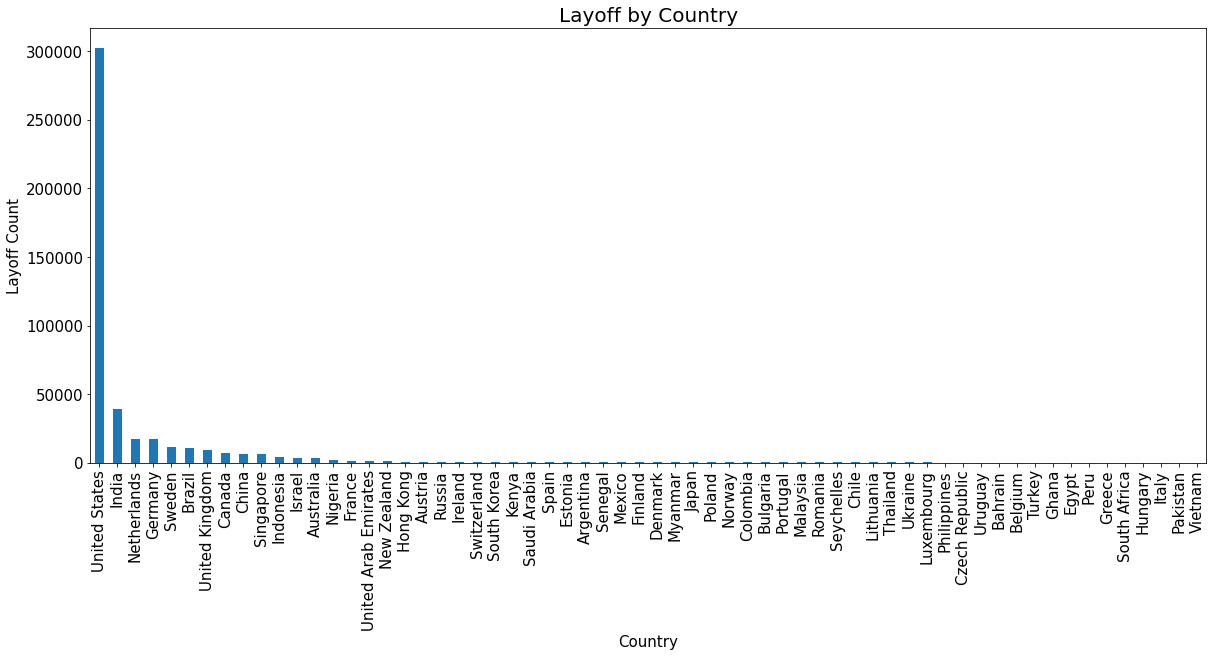

In [26]:
#plotting it with bar chart
df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title('Layoff by Country',size=20)
plt.xlabel('Country',size=15)
plt.ylabel('Layoff Count',size=15);

In [27]:
#calculate the proportion of layoff in the united states to the total layoff.
proportion_of_US_layoff = round(df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False)[0]/df.laid_off_count.sum(),3)
proportion_of_US_layoff

0.675

In [28]:
#calculate the proportion of layoff in india to the total layoff.
proportion_of_India_layoff = round(df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False)[1]/df.laid_off_count.sum(),3)
proportion_of_India_layoff

0.087

> **Here we can see that the United States has the most layoff by far with (65.9%) of the total layoffs, followed by India with (12.7%).**

> **The United States and India, having (78.6%) of all the layoffs, which leaves only (21.4%) shared by the other countries.**

In [29]:
#find layoff by industry
df.groupby('industry')['laid_off_count'].sum().sort_values(ascending=False)

industry
Consumer          56340
Retail            54825
Other             39308
Transportation    37784
Food              33962
Finance           30629
Healthcare        28000
Hardware          25208
Real Estate       18360
Travel            17159
Education         14169
Sales             13216
Crypto            10785
Marketing         10478
Fitness            8898
Security           6770
Data               6396
HR                 5899
Infrastructure     5875
Media              5869
Logistics          4026
Construction       3863
Support            3523
Recruiting         2890
Product            1233
Legal               836
Energy              802
Aerospace           661
Manufacturing       158
Unknown              42
Name: laid_off_count, dtype: int32

In [30]:
#check th Unknown in industry column
df.query('industry == "Unknown"')

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
164,Wattpad,Toronto,Unknown,42,0.15,2023-08-03 00:00:00,117.0,Acquired,Canada,8,Thursday,2023
516,Bally's Interactive,Providence,Unknown,0,0.15,2023-01-18 00:00:00,946.0,Post-IPO,United States,1,Wednesday,2023


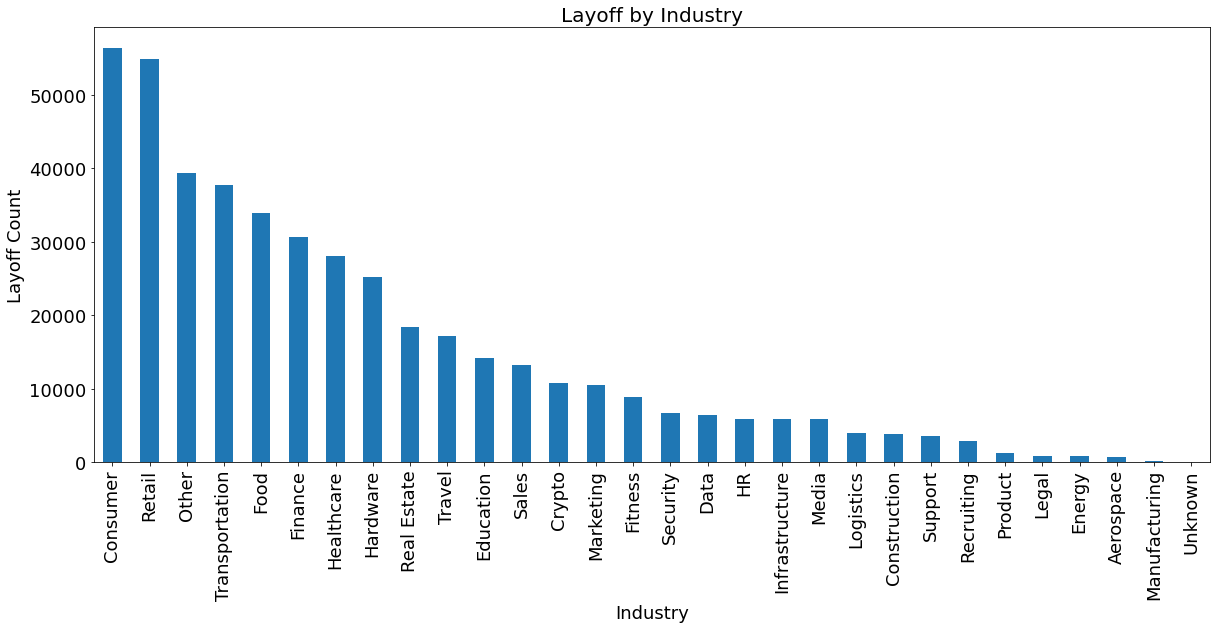

In [31]:
#plotting it wiht bar chart
df.groupby('industry')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=18)
plt.title('Layoff by Industry',size=20)
plt.xlabel('Industry',size=18)
plt.ylabel('Layoff Count',size=18);

> **If we look at the numbers of layoffs in every industry, we will find that Transportation followed by consumer, retail, and finance have layoffs between 20k to 30k.**

> **Food followed by real estate, travel, healthcare and education have layoffs between 10k to 20k.**

> **Legal has the least layoffs followed by aerospace, product and energy.**

In [32]:
#find average layoff for each industry
df.groupby('industry')['percentage'].mean().sort_values(ascending=False).round(3)

industry
Aerospace         0.377
Recruiting        0.256
Crypto            0.238
Travel            0.237
Construction      0.232
Product           0.217
Food              0.213
Fitness           0.208
Education         0.207
Real Estate       0.204
Healthcare        0.202
Retail            0.178
Finance           0.170
Transportation    0.167
Infrastructure    0.163
Consumer          0.162
Legal             0.162
Other             0.156
Media             0.152
Unknown           0.150
Marketing         0.147
Logistics         0.134
HR                0.127
Energy            0.125
Security          0.122
Data              0.119
Support           0.108
Hardware          0.075
Sales             0.064
Manufacturing     0.062
Name: percentage, dtype: float64

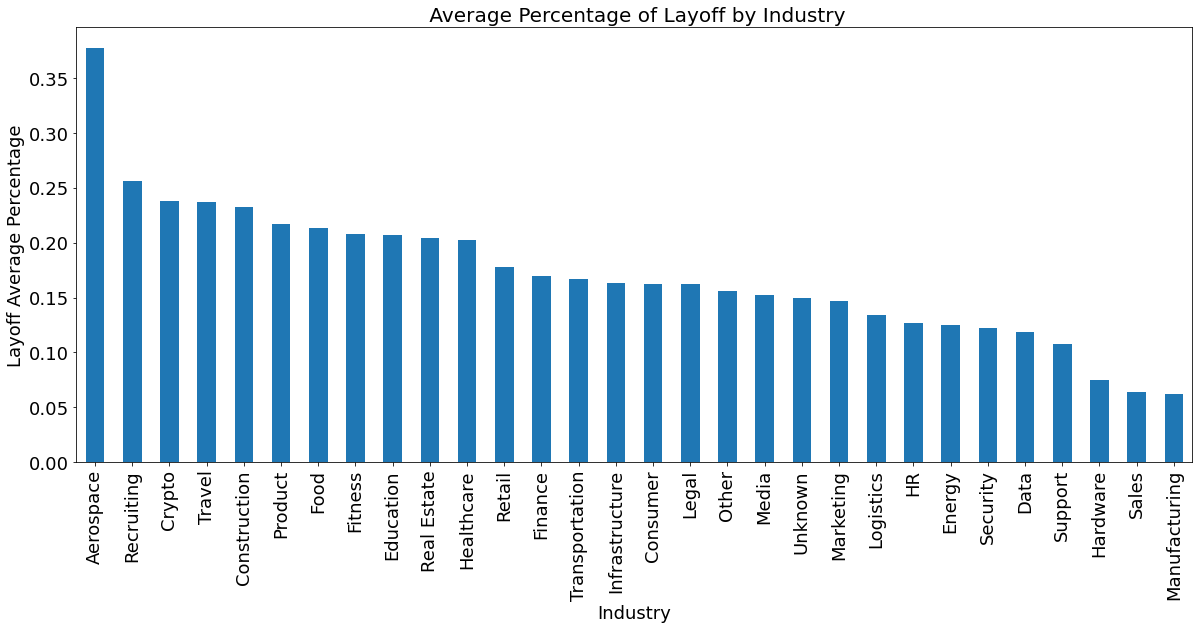

In [33]:
#plot it with bar chart
df.groupby('industry')['percentage'].mean().sort_values(ascending=False).round(3).plot(kind='bar',figsize=(20,8),fontsize=18)
plt.title(' Average Percentage of Layoff by Industry',size=20)
plt.xlabel('Industry',size=18)
plt.ylabel('Layoff Average Percentage',size=18);

> **If we look at the average percentage of layoffs in every industry, we can see that Aerospace has the most average percentage of layoffs (37.7%), followed by Product (25.5%).**

> **Sales has the least layoff percentage (5.5%).**

> **If we looked from the employee side, Transportation followed by consumer, retail, and finance were the most affected industries by covid-19. Legal followed by aerospace, product, and energy were the least affected industries by covid-19.**

> **But if we looked from the Industries owner's side, Aerospace followed by Product, were the most affected industries by covid-19. And Sales was the least affected industry by covid-19.**

In [34]:
#find layoff by stage
df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False)

stage
Post-IPO          244796
Unknown            43430
Acquired           35605
Series B           24568
Series C           21104
Series D           19610
Series E           13376
Series F           10324
Private Equity      8087
Series H            7344
Series A            6703
Series G            3697
Series J            3570
Series I            2855
Seed                1801
Subsidiary          1094
Name: laid_off_count, dtype: int32

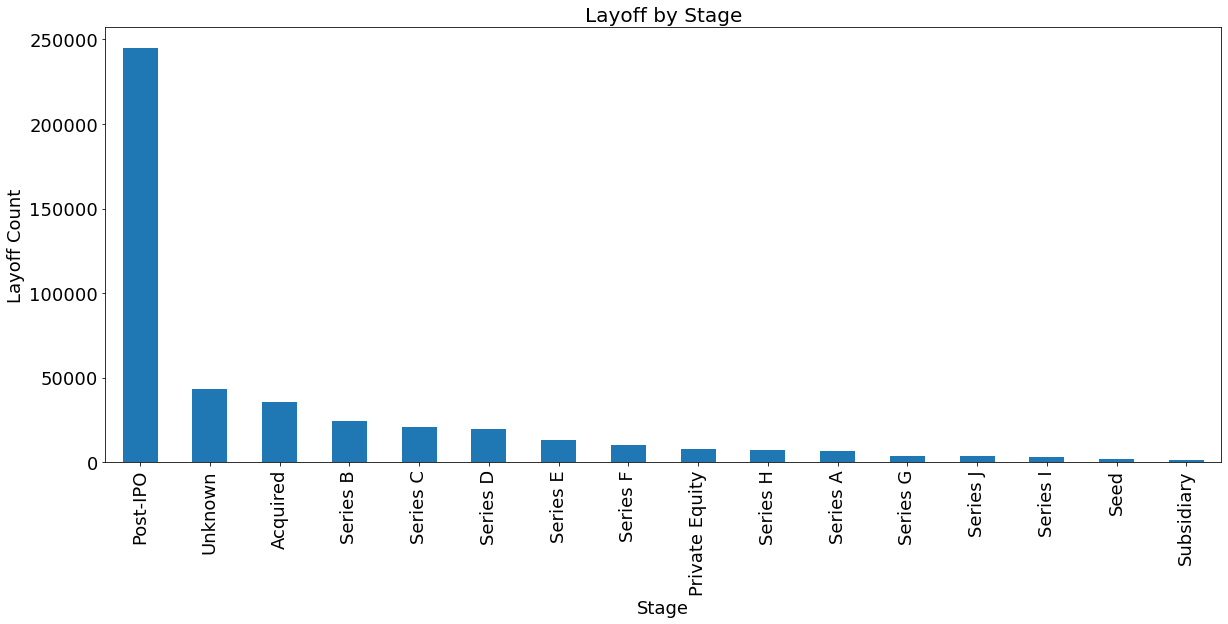

In [35]:
#plottig it with bar chart
df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=18)
plt.title('Layoff by Stage',size=20)
plt.xlabel('Stage',size=18)
plt.ylabel('Layoff Count',size=18);


In [36]:
#calculate the proportion of layoff in IPO stage to the total layoff.
proportion_of_IPO_layoff = round(df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False)[0]/df.laid_off_count.sum(),3)
proportion_of_IPO_layoff

0.546

In [37]:
#calculate the proportion of layoff in Seed stage to the total layoff.
proportion_of_Seed_layoff = round(df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False)[14]/df.laid_off_count.sum(),3)
proportion_of_Seed_layoff

0.004

> **IPO stage companies have the most layoffs with (39.8%).**

> **Seed stage companies have the least layoffs with (0.6%)**

In [38]:
#layoff by month for year 2020
df20 = df.query('year == 2020')
df1 = df20.groupby('month')['laid_off_count'].sum().to_frame()
df1.rename(columns={'laid_off_count':'layoff_2020'},inplace=True)
df1

,layoff_2020
month,
1,3608
2,2288
3,11719
4,17290
5,16674
6,9363
7,10672
8,3393
9,2027


In [39]:
#layoff by month for 2021
df21 = df.query('year == 2021')
df2 = df21.groupby('month')['laid_off_count'].sum().to_frame()
df2.rename(columns={'laid_off_count':'layoff_2021'},inplace=True)
df2

,layoff_2021
month,
1,8392
2,2400
3,87
4,114
5,1822
6,1960
7,80
8,67
9,531


In [40]:
#layoff by month for 2022
df22 = df.query('year == 2022')
df3 = df22.groupby('month')['laid_off_count'].sum().to_frame()
df3.rename(columns={'laid_off_count':'layoff_2022'},inplace=True)
df3

,layoff_2022
month,
1,4372
2,5099
3,5984
4,8929
5,8878
6,15907
7,17134
8,17831
9,22857


In [41]:
#combined them in one data frame
df_combined = pd.concat([df3,df2,df1], axis=1)
df_combined

,layoff_2022,layoff_2021,layoff_2020
month,,,
1,4372,8392.0,3608
2,5099,2400.0,2288
3,5984,87.0,11719
4,8929,114.0,17290
5,8878,1822.0,16674
6,15907,1960.0,9363
7,17134,80.0,10672
8,17831,67.0,3393
9,22857,531.0,2027


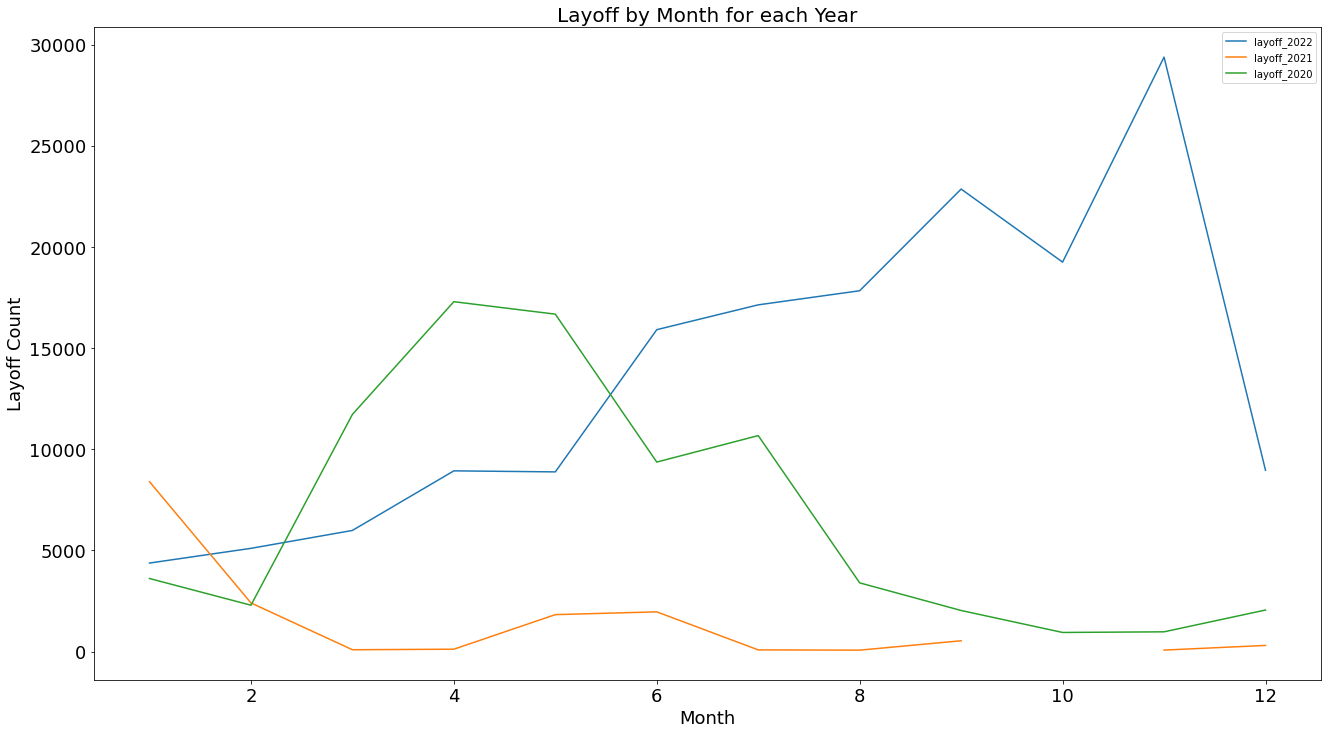

In [42]:
#plotting it with line  chart
df_combined.plot(kind='line',figsize=(22,12),fontsize=18)
plt.title('Layoff by Month for each Year',size=20)
plt.xlabel('Month',size=18)
plt.ylabel('Layoff Count',size=18);

> **In 2020, starting from March when the covid-19 hit the world, the most layoff month was Abril with (26710) layoff, followed by May then started to decrease, until in December layoffs starts to increase again.**

> **In 2021, the layoffs were the least between the years 2020,2021,2022. January has the most layoffs (6013), followed by June and November.**

> **In 2022, November has the worst layoff, not only in that year but in all the 3 years with (51300) layoffs.**

In [43]:
#funds raised by industry
df.groupby('industry')['funds_raised'].sum().sort_values(ascending=False)

industry
Media             513646.8000
Transportation    315333.7400
Consumer          220030.3000
Real Estate       126581.5000
Finance           116571.7800
Food              116482.9755
Retail             91212.1000
Healthcare         67962.0000
Other              44753.0000
Travel             40829.5000
Education          28731.8000
Data               28723.6000
Marketing          22436.7000
Crypto             20874.0000
Security           20835.0000
Logistics          15578.0000
Fitness            13031.6000
HR                  9876.7000
Infrastructure      8734.0000
Hardware            8286.0000
Support             8190.6000
Sales               7940.4000
Product             6693.2000
Construction        6114.0000
Energy              4219.0000
Aerospace           3477.0000
Legal               2391.0000
Recruiting          2096.0000
Unknown             1063.0000
Manufacturing        274.0000
Name: funds_raised, dtype: float64

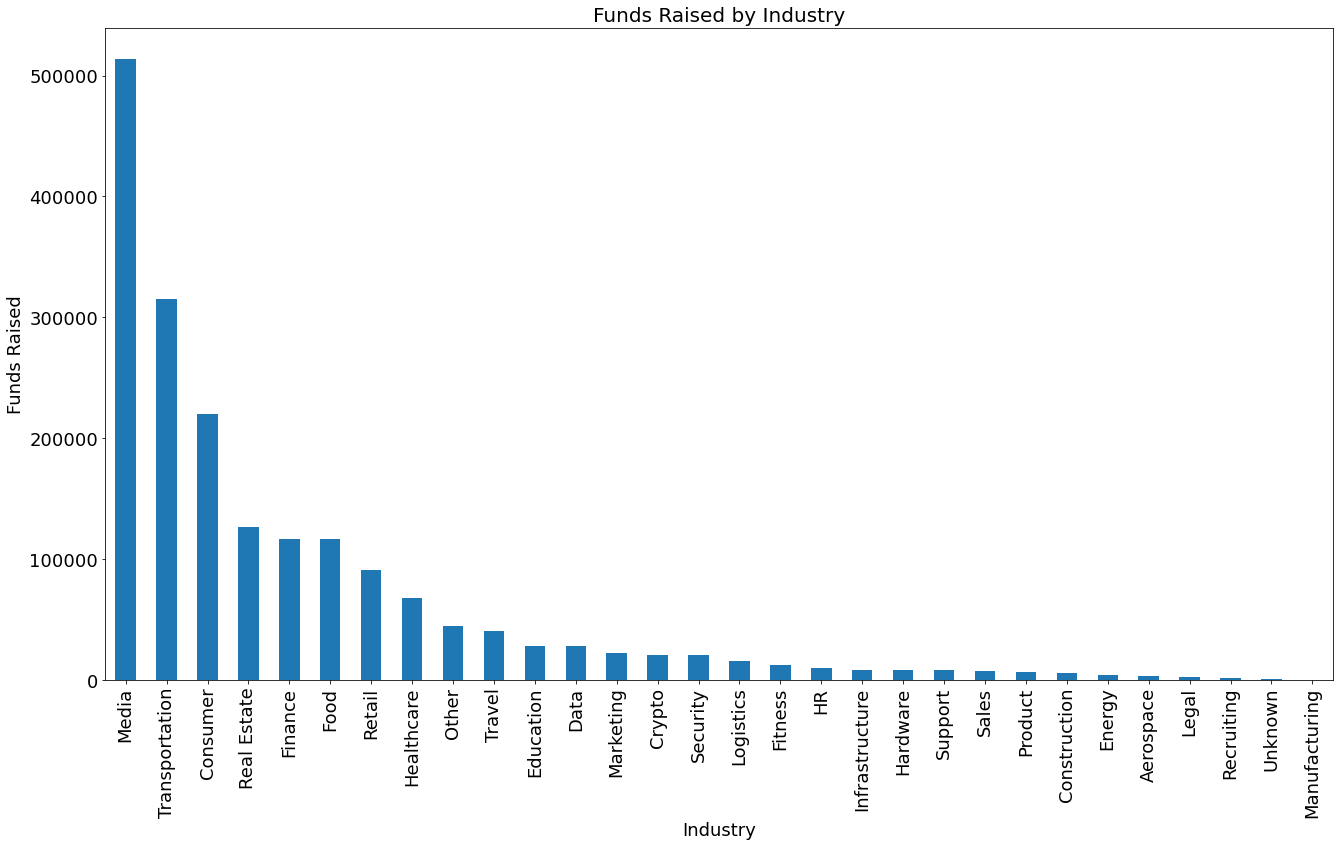

In [44]:
#plotting it with bar chart
df.groupby('industry')['funds_raised'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Funds Raised by Industry',size=20)
plt.xlabel('Industry',size=18)
plt.ylabel('Funds Raised',size=18);

> **The Media industry has the most funds raised, followed by Transportation and Consumer.**

> **The legal industry has the least funds raised.**

In [45]:
#funds raised by stage
df.groupby('stage')['funds_raised'].sum().sort_values(ascending=False)

stage
Post-IPO          1.143910e+06
Unknown           1.710486e+05
Series H          9.838500e+04
Series D          8.043460e+04
Series E          7.415900e+04
Series C          6.222180e+04
Series F          5.375480e+04
Acquired          5.028540e+04
Series B          3.186958e+04
Private Equity    3.114054e+04
Series J          2.324200e+04
Series I          1.603600e+04
Series G          1.598000e+04
Subsidiary        1.160000e+04
Series A          8.507400e+03
Seed              3.946755e+02
Name: funds_raised, dtype: float64

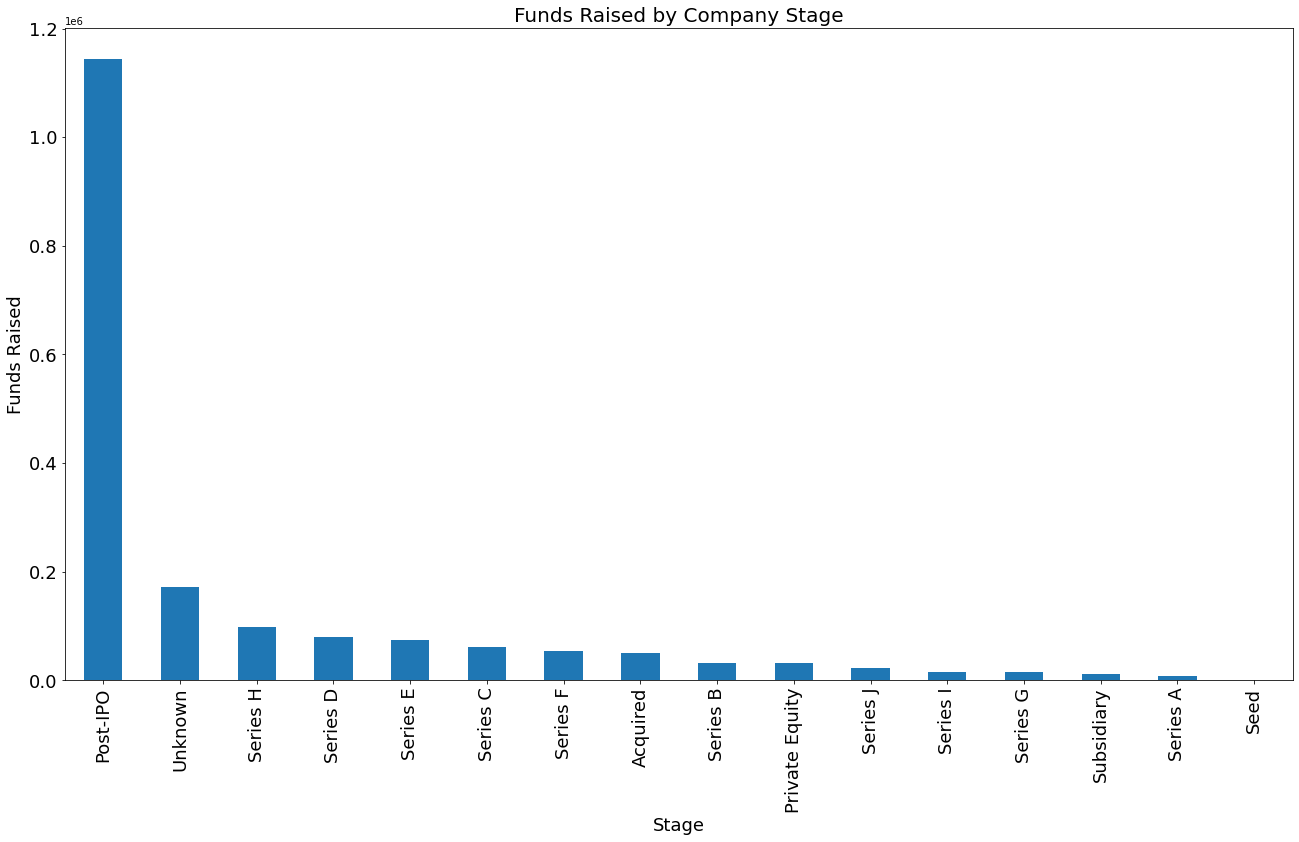

In [46]:
#plotting it with bar chart
df.groupby('stage')['funds_raised'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Funds Raised by Company Stage',size=20)
plt.xlabel('Stage',size=18)
plt.ylabel('Funds Raised',size=18);

> **The IPO stage companies have by far, the most funds raised, and the Seed stage has the least funds raised.**

In [47]:
#top 10 funds raised companies
df.groupby('company')['funds_raised'].sum().nlargest(10)

company
Netflix          487600.0
Uber             123500.0
Meta              52000.0
Twitter           44400.0
WeWork            43500.0
WeWork            41700.0
Delivery Hero     26500.0
Bytedance         26200.0
Tencent           25200.0
Rivian            24500.0
Name: funds_raised, dtype: float64

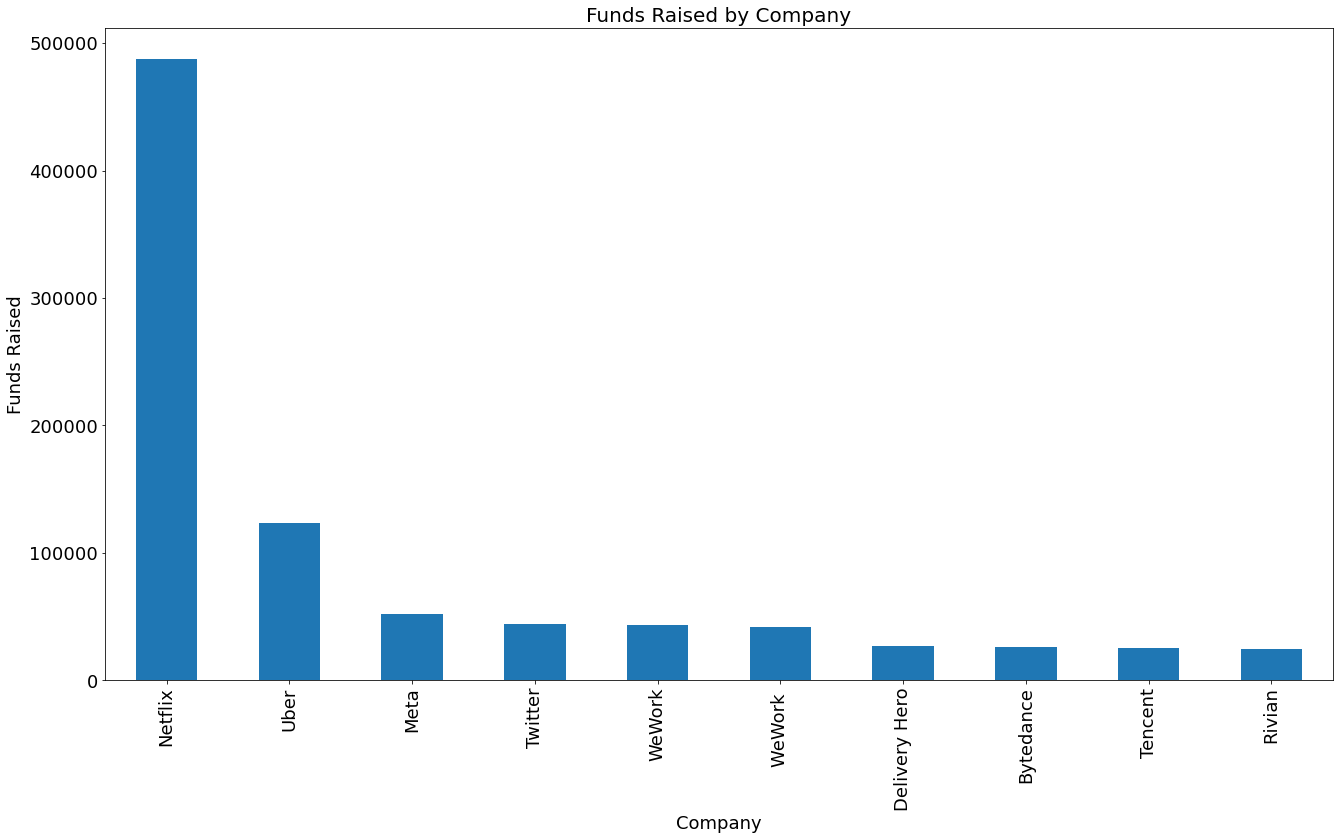

In [48]:
#plotting it with bar chart
df.groupby('company')['funds_raised'].sum().nlargest(10).plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Funds Raised by Company',size=20)
plt.xlabel('Company',size=18)
plt.ylabel('Funds Raised',size=18);

> **Netflix has the largest funds raised with (487600), followed by Uber with (123500).**

In [49]:
#index for top 10 largest layoff dates 
ind = df['laid_off_count'].nlargest(10).index

In [50]:
#10 largest layoff dates
df.loc[ind]

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
467,Google,SF Bay Area,Consumer,12000,0.06,2023-01-20 00:00:00,26.0,Post-IPO,United States,1,Friday,2023
940,Meta,SF Bay Area,Consumer,11000,0.13,2022-09-11 00:00:00,26000.0,Post-IPO,United States,9,Sunday,2022
148,Meta,SF Bay Area,Consumer,10000,0.00,2023-03-14 00:00:00,26000.0,Post-IPO,United States,3,Tuesday,2023
500,Microsoft,Seattle,Other,10000,0.05,2023-01-18 00:00:00,1.0,Post-IPO,United States,1,Wednesday,2023
872,Amazon,Seattle,Retail,10000,0.03,2022-11-16 00:00:00,108.0,Post-IPO,United States,11,Wednesday,2022
132,Amazon,Seattle,Retail,9000,0.00,2023-03-20 00:00:00,108.0,Post-IPO,United States,3,Monday,2023
217,Ericsson,Stockholm,Other,8500,0.08,2023-02-24 00:00:00,663.0,Post-IPO,Sweden,2,Friday,2023
24,Flink,Berlin,Food,8000,0.40,2023-04-24 00:00:00,1000.0,Series B,Germany,4,Monday,2023
640,Amazon,Seattle,Retail,8000,0.02,2023-04-01 00:00:00,108.0,Post-IPO,United States,4,Saturday,2023
641,Salesforce,SF Bay Area,Sales,8000,0.10,2023-04-01 00:00:00,65.0,Post-IPO,United States,4,Saturday,2023


> **From the largest 10 layoffs happened, we can see they are all companies in the United States except the third place is in the Netherlands.**

> **Also, we can see that almost all of the companies are in the IPO stage except the third place in the Acquired stage and the seventh place unknown stage.**

> **Five of the ten companies are in SF Bay Area in the United States.**

> **Four of the ten happend in November 2022.**

> **Meta is the most layoff company with a layoff count of (11000) which represent (13%) of the company employees. Followed by Amazon with a layoff count of (10000) which represent (3%) of the company employees.**

> **Twitter is the fifth most layoff company with a layoff count of (3700), but it represents (50%) of the company employees.**

**Some companies have more than layoffs happened, so now I will show the total layoff by companies.**

In [51]:
#layoff by company
df.groupby('company')['laid_off_count'].sum().nlargest(10)

company
Amazon        27150
Meta          21000
Google        12000
Salesforce    10090
Microsoft     10000
Philips       10000
Ericsson       8500
Flink          8000
Uber           7585
Micron         7200
Name: laid_off_count, dtype: int32

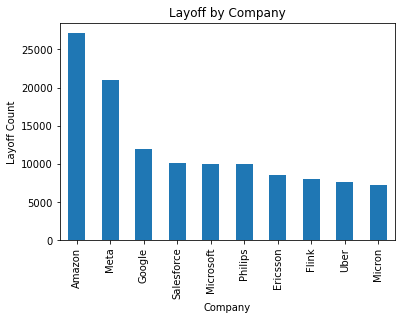

In [52]:
#plotting it with bar chart
df.groupby('company')['laid_off_count'].sum().nlargest(10).plot(kind='bar')
plt.title('Layoff by Company')
plt.xlabel('Company')
plt.ylabel('Layoff Count');

> **Meta still the most layoff company with (11000), followed by Amazon with (10000).**

> **But now we can see that Uber is in third place with (7585), which has more than layoffs dates.**

> **Followed by Booking-com with (4601), Cisco with (4100), etc.**

In [53]:
#filter the data frame to get the number of the companies that went bankrupt
df_bankrupt = df.query('percentage == 1')
df_bankrupt

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
6,Providoor,Melbourne,Food,0,1.0,2023-04-28 00:00:00,0.0,Unknown,Australia,4,Friday,2023
21,RenoRun,Montreal,Construction,0,1.0,2023-04-26 00:00:00,163.0,Series B,Canada,4,Wednesday,2023
40,CoLab,Sydney,Food,0,1.0,2023-04-18 00:00:00,3.0,Seed,Australia,4,Tuesday,2023
46,Quadream,Tel Aviv,Security,0,1.0,2023-04-16 00:00:00,0.0,Unknown,Israel,4,Sunday,2023
52,Bluepad,Bengaluru,Media,0,1.0,2023-04-13 00:00:00,0.0,Seed,India,4,Thursday,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2534,Service,Los Angeles,Travel,0,1.0,2020-03-20 00:00:00,5.0,Seed,United States,3,Friday,2020
2537,Ejento,SF Bay Area,Recruiting,84,1.0,2020-03-19 00:00:00,0.0,Unknown,United States,3,Thursday,2020
2541,Popin,New York City,Fitness,0,1.0,2020-03-19 00:00:00,13.0,Unknown,United States,3,Thursday,2020
2545,Help.com,Austin,Support,16,1.0,2020-03-16 00:00:00,6.0,Seed,United States,3,Monday,2020


In [54]:
#companies that went bankrupt
df_bankrupt.company.unique()

array(['Providoor', 'RenoRun', 'CoLab', 'Quadream', 'Bluepad', 'Heygo',
       'Lazerpay', 'Milkrun', 'Avocargo', 'Toucan', 'Catch', 'Kandela',
       'DUX Education', 'Locomation', 'Fipola', 'Dropp', 'EMX Digital',
       'WeTrade', 'Medly', 'Openpay', 'Mode Global', 'Earth Rides',
       'Britishvolt', 'Arch Oncology', 'Lantern', 'Wyre', 'YourGrocer',
       'Brodmann17', 'Digital Surge', 'Lora DiCarlo', 'Bitfront',
       'BlockFi', 'Assure', 'GoodGood', 'Muni Tienda', 'GloriFi', 'Kite',
       'Deliveroo Australia', 'Protocol', 'Nirvana Money', 'Wavely',
       'Faze Medicines', 'Planetly', 'Fifth Season', 'GoNuts', 'Nuri',
       'Flux Systems', 'Qin1', 'Playdots', 'Collage.com', 'Pastel',
       'Pesto', 'Kitty Hawk', 'Propzy', 'CommonBond', 'Lido Learning',
       'Simple Feast', 'The Wing', 'Reali', 'ShopX', 'Edmodo', 'Pollen',
       'Haus', 'Perceptive Automata', 'Metigy', 'Yabonza', 'Soluto',
       'Airlift', 'Butler Hospitality', 'WanderJaunt', 'Crejo.Fun',
       'Gavelyt

In [55]:
#number of bankrupt companies
df_bankrupt.shape[0]

130

In [56]:
#bankrupt companies by year
df_bankrupt.year.value_counts()

2022    60
2020    36
2023    26
2021     8
Name: year, dtype: int64

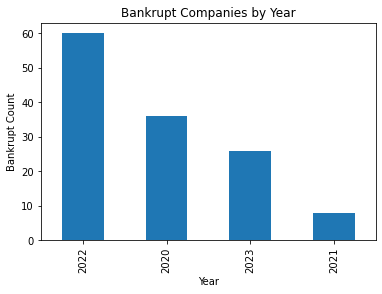

In [57]:
#plotting it with bar chart
df_bankrupt.year.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Year')
plt.xlabel('Year')
plt.ylabel('Bankrupt Count');

In [58]:
#bankrupt companies by country
df_bankrupt.country.value_counts()

United States           76
Australia               11
India                   10
United Kingdom           6
Israel                   4
Germany                  4
Indonesia                3
Canada                   3
Singapore                3
Vietnam                  2
United Arab Emirates     2
Kenya                    1
Colombia                 1
Pakistan                 1
Denmark                  1
Nigeria                  1
Brazil                   1
Name: country, dtype: int64

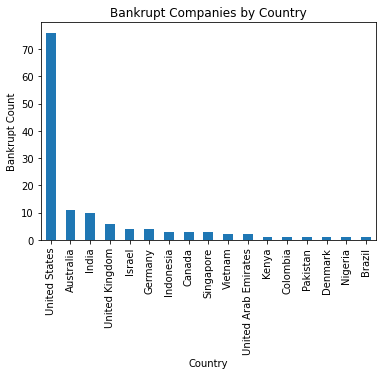

In [59]:
#plotting it with bar chart
df_bankrupt.country.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Country')
plt.xlabel('Country')
plt.ylabel('Bankrupt Count');

In [60]:
df_bankrupt.laid_off_count.value_counts()

0       84
100      4
16       2
60       2
120      2
250      2
65       2
13       2
6        2
137      1
21       1
154      1
20       1
87       1
500      1
221      1
10       1
669      1
4        1
17       1
45       1
300      1
2434     1
44       1
400      1
40       1
101      1
170      1
85       1
1000     1
75       1
140      1
150      1
200      1
206      1
83       1
84       1
Name: laid_off_count, dtype: int64

In [61]:
#bankrupt companies by stage
df_bankrupt.stage.value_counts()

Unknown           38
Seed              26
Series B          20
Series A          18
Acquired          13
Series C           7
Post-IPO           3
Series E           3
Series D           1
Private Equity     1
Name: stage, dtype: int64

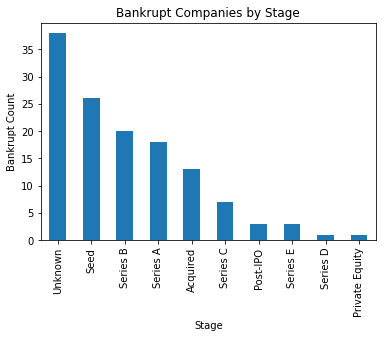

In [62]:
#plotting it with bar chart
df_bankrupt.stage.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Stage')
plt.xlabel('Stage')
plt.ylabel('Bankrupt Count');

In [63]:
#bankrupt companies by industry
df_bankrupt.industry.value_counts()

Food              16
Retail            15
Finance           13
Education         10
Crypto             8
Transportation     7
Healthcare         7
Travel             6
Real Estate        6
Media              6
Consumer           5
Marketing          5
Other              5
Infrastructure     3
Product            3
Recruiting         2
Support            2
Fitness            2
Construction       2
Security           2
HR                 1
Logistics          1
Legal              1
Data               1
Aerospace          1
Name: industry, dtype: int64

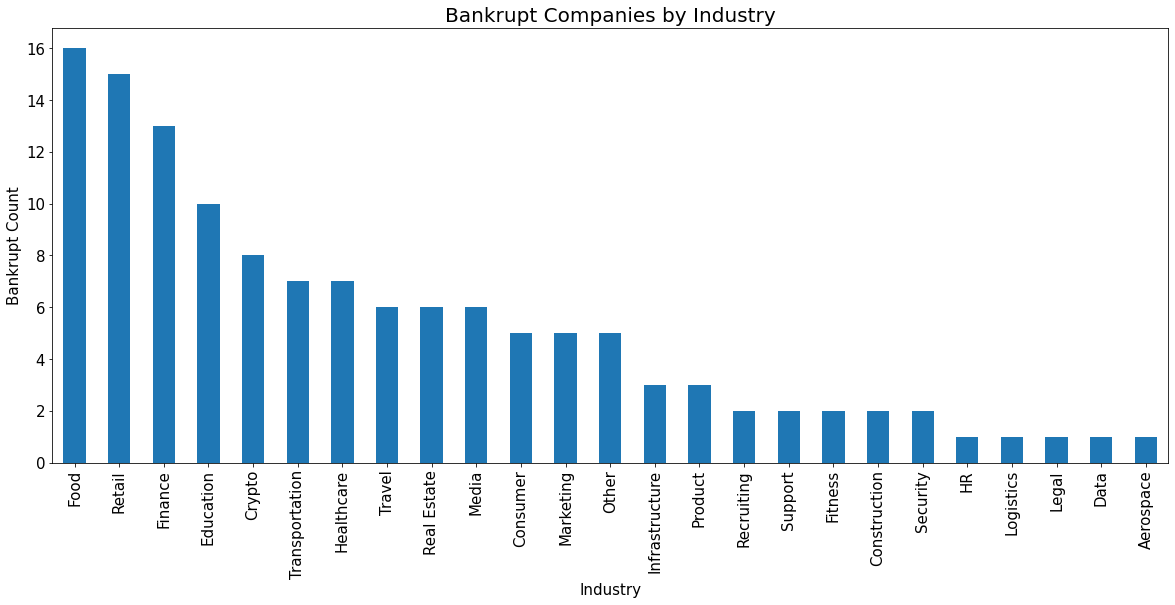

In [64]:
#plotting it with bar chart
df_bankrupt.industry.value_counts().plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title('Bankrupt Companies by Industry',size=20)
plt.xlabel('Industry',size=15)
plt.ylabel('Bankrupt Count',size=15);

**Bankrupt Companies Insights**
> **We have 100 companies that had been bankrupt over 3 years. In 2020 (36) companies, in 2021 (8) companies, and in 2022 (56) companies.**

> **We can not see how many employees had been laid off because (60) of (100) companies, the data about laid off counts were null values filled with zero.**

> **In the United States, over 3 years, (65) companies had been bankrupt, followed by India (7) companies.**

> **Most of these companies' stages are unknown. The seed stage is the most known bankrupt stage with (21) companies, followed by Series B (19).**

> **The most bankrupt companies are in the Retail industry (12), followed by the Food industry (11), and the Finance industry (10).**

In [65]:
#create a data frame with only United States companies
df_US = df.query('country == "United States"')

In [66]:
#number of locations
df_US.location.nunique()

97

In [67]:
#largest 20 location 
df_US.groupby('location')['laid_off_count'].sum().nlargest(20)

location
SF Bay Area        145021
Seattle             44741
New York City       30010
Boston              11458
Austin              11199
Boise                7200
Los Angeles          6985
Chicago              6500
Phoenix              5067
Philadelphia         3089
Miami                2690
San Diego            2647
Washington D.C.      2372
Columbus             2195
Atlanta              1877
Portland             1609
Salt Lake City       1578
Detroit              1180
San Luis Obispo      1100
Cleveland            1000
Name: laid_off_count, dtype: int32

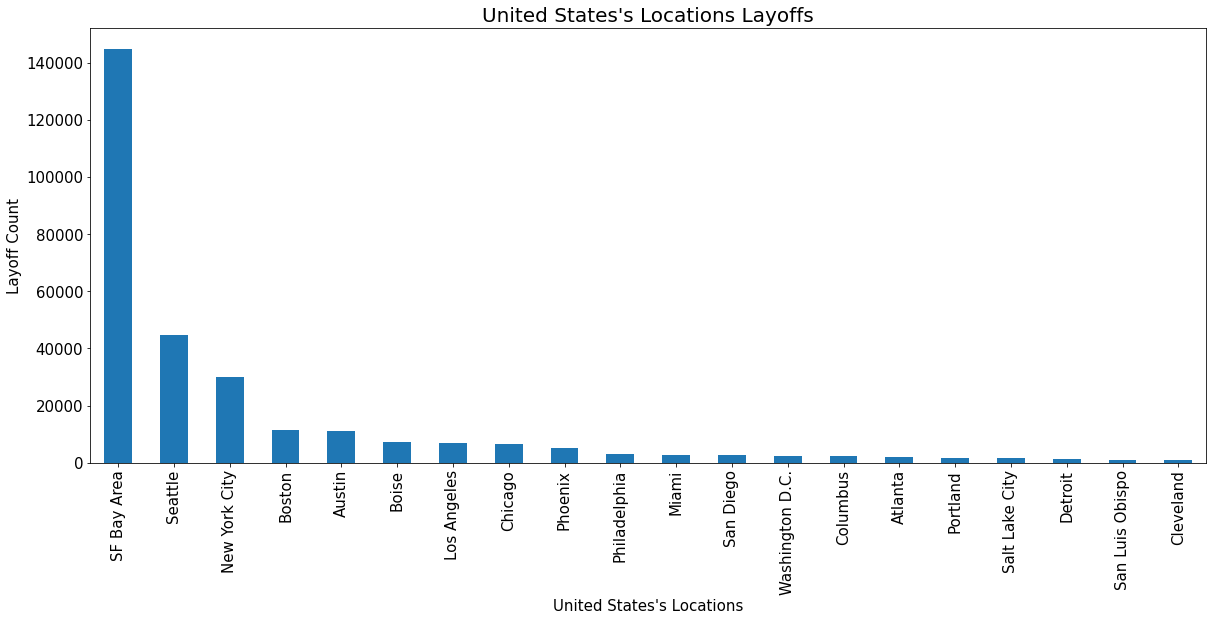

In [68]:
#plotting it with bar chart
df_US.groupby('location')['laid_off_count'].sum().nlargest(20).plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title("United States's Locations Layoffs",size=20)
plt.xlabel("United States's Locations",size=15)
plt.ylabel("Layoff Count",size=15);

> **We know that the largest layoffs were in the United States, so I want to separate it and show the top 10 location that has the largest layoffs.**

> **SF Bay Area by far has the largest layoffs with (80267), followed by New York City with (22043) layoffs, and Seattle with (16051) layoffs.**